In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast


Get general overview of the data:

In [5]:
df_charging_sessions.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [4]:
df_charging_sessions = pd.read_csv(r'C:\Users\asim2\AA_Project\charging_sessions.csv')
df_charging_sessions.dtypes

Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
dtype: object

In [6]:
df_charging_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [7]:
df_charging_sessions.describe()

,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


#extract 'userInputs'

In [30]:
a = df_charging_sessions['userInputs'].iloc[1]

a = a.replace("'", '"')
#print(parsed_data)
parsed_data = json.loads(a)

for item in parsed_data:
    for key, value in item.items():
        print(f"{key}: {value}")

JSONDecodeError: Expecting value: line 1 column 157 (char 156)

In [53]:
#prompt: cell content and error message of cell above, then manually adjusted answer from handling one entry to handling whole column
a = df_charging_sessions['userInputs'].iloc[1]
parsed_data = ast.literal_eval(a)
print(f"Type after parsing: {type(parsed_data)}")  

for item in parsed_data:
    for key, value in item.items():
        print(f"{key}: {value}")
##
df_user_inputs = df_charging_sessions['userInputs']
i = 0
#may be possible more efficiently, but since it has to run once not urgent to optimize
#really slow since ~60k*10, optimize later
for index,value in df_user_inputs.items():
    if pd.isna(value):
        continue
    for user in ast.literal_eval(value):
        #assuming there are rows with multiple users(or 'subusers' or so), needs to be checked, if not this is not necessary
        for key,value in user.items():                
            if key not in df_charging_sessions.columns:
                df_charging_sessions[key] = None  
            
            df_charging_sessions.at[index, key] = value
df_charging_sessions.iloc[0]
    





Type after parsing: <class 'list'>
WhPerMile: 280
kWhRequested: 70.0
milesRequested: 250
minutesAvailable: 595
modifiedAt: Thu, 02 Jan 2020 13:37:11 GMT
paymentRequired: True
requestedDeparture: Thu, 02 Jan 2020 23:31:50 GMT
userID: 4275


Unnamed: 0                                                            0
id                                             5e23b149f9af8b5fe4b973cf
connectionTime                                2020-01-02 13:08:54+00:00
disconnectTime                                2020-01-02 19:11:15+00:00
doneChargingTime                              2020-01-02 17:31:35+00:00
kWhDelivered                                                     25.016
sessionID                        1_1_179_810_2020-01-02 13:08:53.870034
siteID                                                                1
spaceID                                                         AG-3F30
stationID                                                   1-1-179-810
timezone                                            America/Los_Angeles
userID                                                            194.0
userInputs            [{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...
date                                                         202

# How to Handle Missing or Erroneous Data?

## Ideas

- **For missing data, get an overview of the column:**
  - Is it enough to fill in mean data of the column?
  - Is missing data so crucial and unique that the entire row has to be deleted?
  - Is there no appropriate way to fill but the column isn't crucial? Then ignore it in referring calculations, reports, etc.

- **How to spot erroneous data?**
  - Plot histogram of columns; are there outliers?
  - Plausibility checks (for example, is 'connectionTime' later than 'disconnectTime'?)
  - Check if duplicate values are present


Preparing Plots


In [51]:
print(df_charging_sessions.head())

   Unnamed: 0                        id            connectionTime  \
0           0  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
1           1  5e23b149f9af8b5fe4b973d0 2020-01-02 13:36:50+00:00   
2           2  5e23b149f9af8b5fe4b973d1 2020-01-02 13:56:35+00:00   
3           3  5e23b149f9af8b5fe4b973d2 2020-01-02 13:59:58+00:00   
4           4  5e23b149f9af8b5fe4b973d3 2020-01-02 14:00:01+00:00   

             disconnectTime          doneChargingTime  kWhDelivered  \
0 2020-01-02 19:11:15+00:00 2020-01-02 17:31:35+00:00        25.016   
1 2020-01-02 22:38:21+00:00 2020-01-02 20:18:05+00:00        33.097   
2 2020-01-03 00:39:22+00:00 2020-01-02 16:35:06+00:00         6.521   
3 2020-01-02 16:38:39+00:00 2020-01-02 15:18:45+00:00         2.355   
4 2020-01-02 22:08:40+00:00 2020-01-02 18:17:30+00:00        13.375   

                                sessionID  siteID  spaceID    stationID  ...  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  AG-3F30  1-1-179-810  ...  

In [8]:
# Convert date columns to datetime
df_charging_sessions['connectionTime'] = pd.to_datetime(df_charging_sessions['connectionTime'])
df_charging_sessions['disconnectTime'] = pd.to_datetime(df_charging_sessions['disconnectTime'])
df_charging_sessions['doneChargingTime'] = pd.to_datetime(df_charging_sessions['doneChargingTime'])

# ONLY FOR NOW: Drop rows with empty entries
df_cleaned = df_charging_sessions.dropna()

# Calculate charging duration in minutes and store as integers
df_cleaned['charging_duration'] = (
    (df_cleaned['disconnectTime'] - df_cleaned['connectionTime'])
    .dt.total_seconds() / 60
).astype(int)

# Calculate time between finished loading and disconnection in minutes and store as integers
df_cleaned['connection_wo_charging_time'] = (
    (df_cleaned['disconnectTime'] - df_cleaned['doneChargingTime'])
    .dt.total_seconds() / 60
).astype(int)


C:\Users\asim2\AppData\Local\Temp\ipykernel_21612\440479101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['charging_duration'] = (
C:\Users\asim2\AppData\Local\Temp\ipykernel_21612\440479101.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['connection_wo_charging_time'] = (


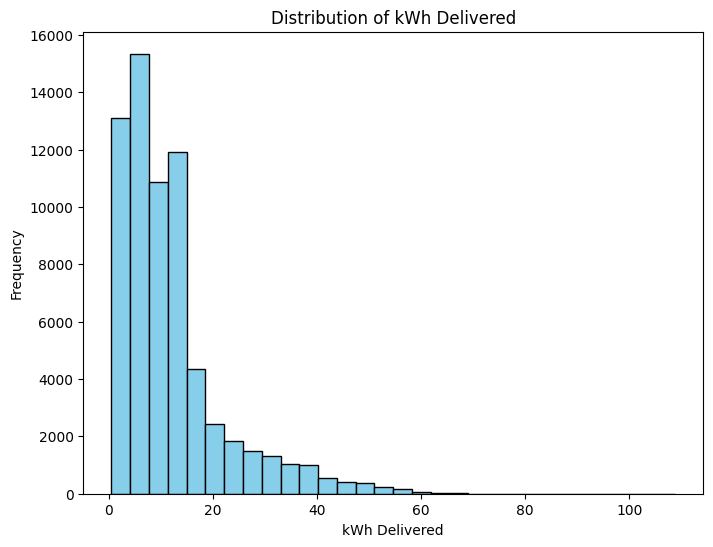

In [9]:
plt.figure(figsize=(8, 6))
df_charging_sessions['kWhDelivered'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('kWh Delivered')
plt.ylabel('Frequency')
plt.title('Distribution of kWh Delivered')
plt.grid(False)
plt.show()


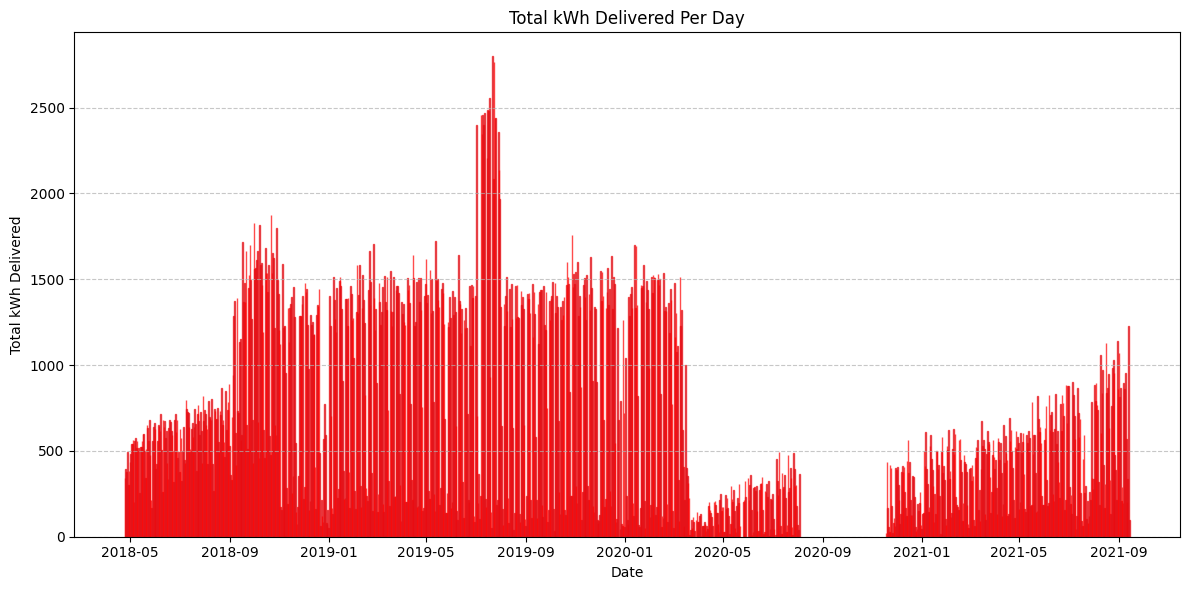

In [10]:
# Ensure connectionTime is a datetime object
df_charging_sessions['connectionTime'] = pd.to_datetime(df_charging_sessions['connectionTime'])

# Group by date and calculate the sum of kWhDelivered
df_charging_sessions['date'] = df_charging_sessions['connectionTime'].dt.date
daily_kWh = df_charging_sessions.groupby('date')['kWhDelivered'].sum()

# Plot the result as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    daily_kWh.index,
    daily_kWh.values,
    edgecolor='red',
    alpha=0.7
)
plt.xlabel('Date')
plt.ylabel('Total kWh Delivered')
plt.title('Total kWh Delivered Per Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for y-axis
plt.tight_layout()
plt.show()

In [11]:
df_cleaned['connection_wo_charging_time'].head()

0     99
1    140
2    484
3     79
4    231
Name: connection_wo_charging_time, dtype: int32

C:\Users\asim2\AppData\Local\Temp\ipykernel_21612\2836921136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['connectionTime'] = pd.to_datetime(df_cleaned['connectionTime'])
C:\Users\asim2\AppData\Local\Temp\ipykernel_21612\2836921136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = df_cleaned['connectionTime'].dt.date


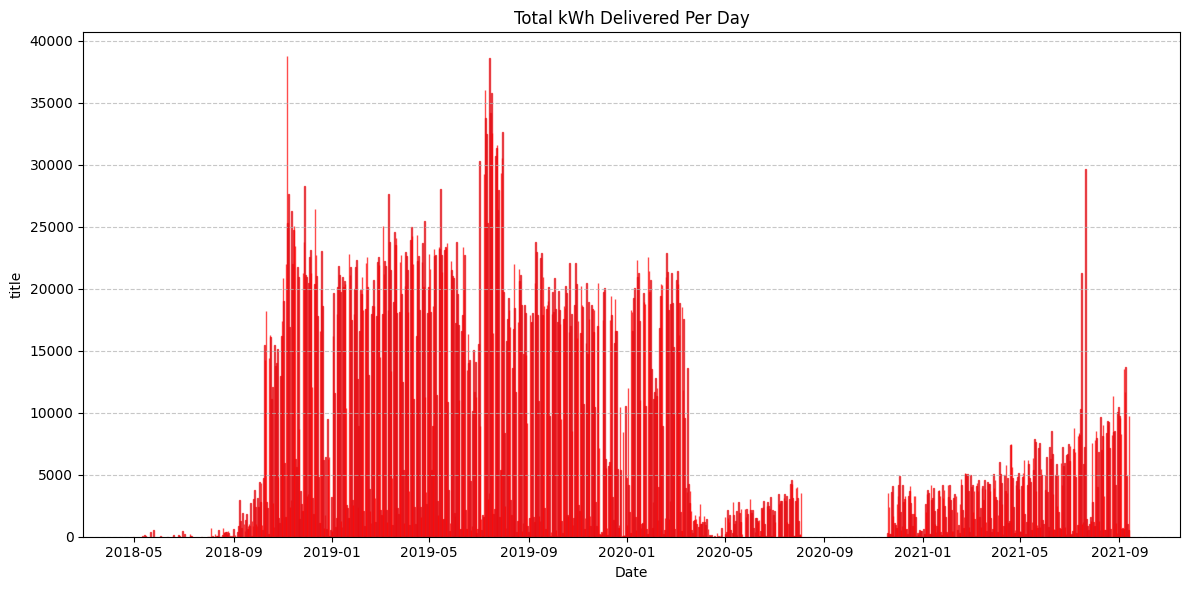

In [12]:
# Ensure connectionTime is a datetime object
df_cleaned['connectionTime'] = pd.to_datetime(df_cleaned['connectionTime'])

# Group by date and calculate the sum of kWhDelivered
df_cleaned['date'] = df_cleaned['connectionTime'].dt.date
daily_no_charge_time = df_cleaned.groupby('date')['connection_wo_charging_time'].sum()

# Plot the result as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    daily_no_charge_time.index,
    daily_no_charge_time.values,
    edgecolor='red',
    alpha=0.7
)
plt.xlabel('Date')
plt.ylabel('title')
plt.title('Total kWh Delivered Per Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for y-axis
plt.tight_layout()
plt.show()

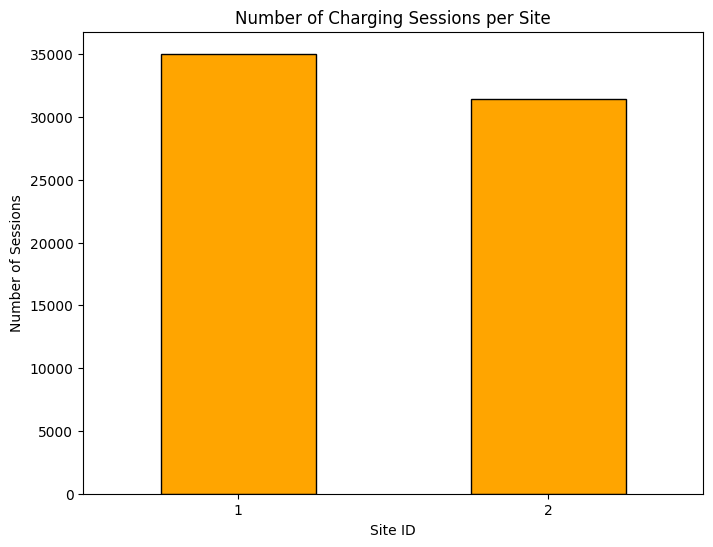

In [13]:
# Count of sessions per siteID
sessions_per_site = df_charging_sessions['siteID'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sessions_per_site.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Site ID')
plt.ylabel('Number of Sessions')
plt.title('Number of Charging Sessions per Site')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


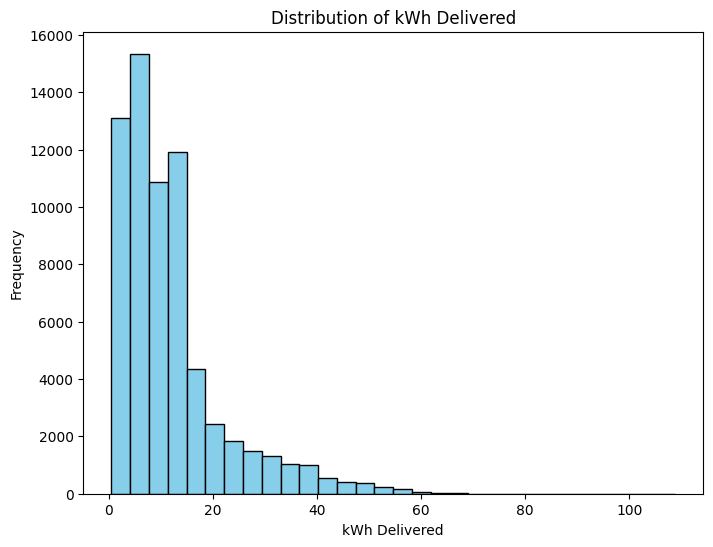

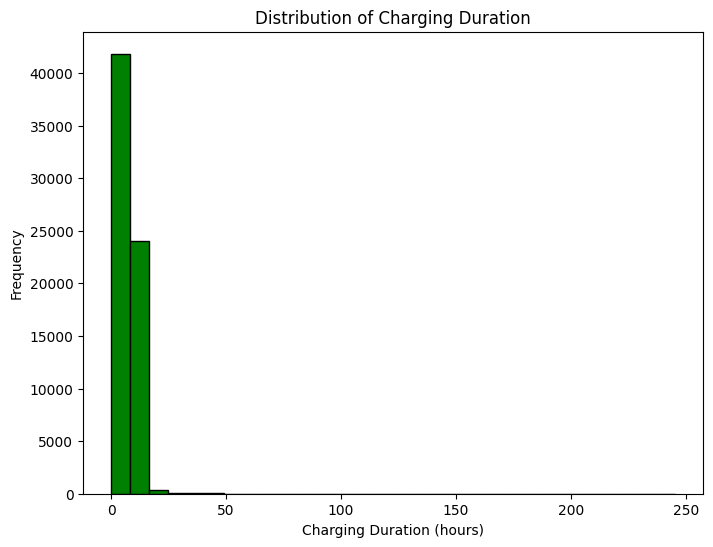

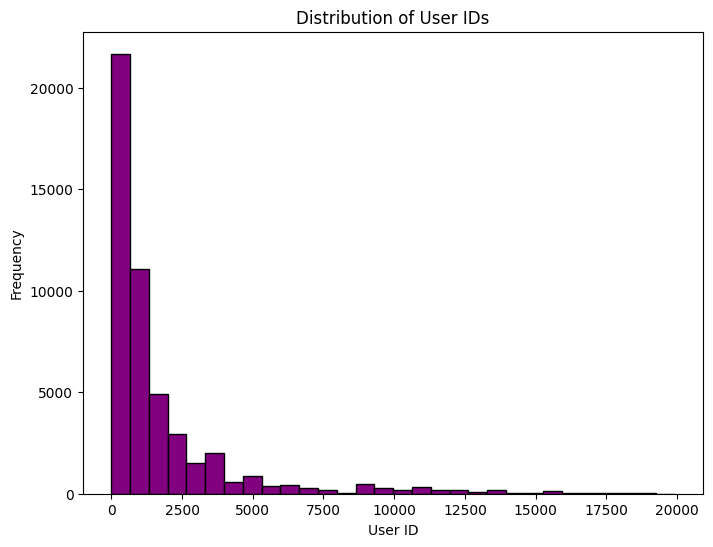

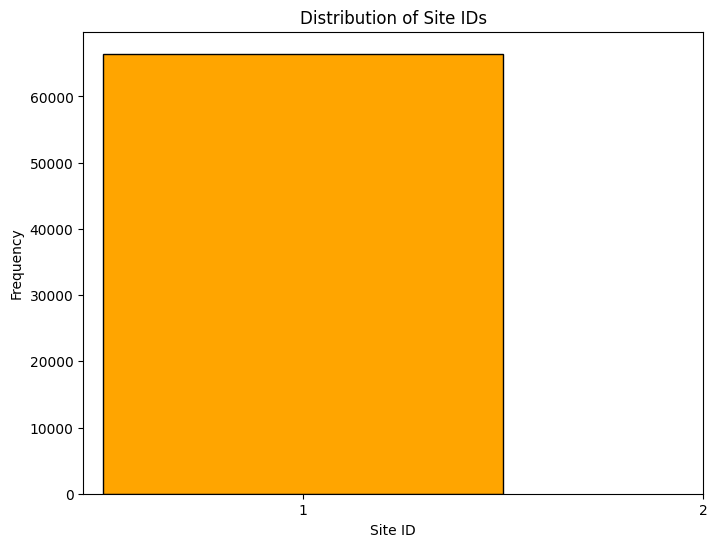

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation
df_charging_sessions['connectionTime'] = pd.to_datetime(df_charging_sessions['connectionTime'])
df_charging_sessions['disconnectTime'] = pd.to_datetime(df_charging_sessions['disconnectTime'])

df_charging_sessions['charging_duration'] = (
    df_charging_sessions['disconnectTime'] - df_charging_sessions['connectionTime']
).dt.total_seconds() / 3600

# Histogram of kWh Delivered
plt.figure(figsize=(8, 6))
df_charging_sessions['kWhDelivered'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('kWh Delivered')
plt.ylabel('Frequency')
plt.title('Distribution of kWh Delivered')
plt.grid(False)
plt.show()

# Histogram of Charging Duration
plt.figure(figsize=(8, 6))
df_charging_sessions['charging_duration'].hist(bins=30, color='green', edgecolor='black')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Charging Duration')
plt.grid(False)
plt.show()

# Histogram of User IDs
plt.figure(figsize=(8, 6))
df_charging_sessions['userID'].dropna().hist(bins=30, color='purple', edgecolor='black')
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.title('Distribution of User IDs')
plt.grid(False)
plt.show()

# Histogram of Site IDs
plt.figure(figsize=(8, 6))
df_charging_sessions['siteID'].hist(
    bins=range(
        int(df_charging_sessions['siteID'].min()), 
        int(df_charging_sessions['siteID'].max()) + 1
    ),
    color='orange',
    edgecolor='black',
    align='left'
)
plt.xlabel('Site ID')
plt.ylabel('Frequency')
plt.title('Distribution of Site IDs')
plt.xticks(range(
    int(df_charging_sessions['siteID'].min()), 
    int(df_charging_sessions['siteID'].max()) + 1
))
plt.grid(False)
plt.show()
